# 🔄 TensorFlow Workflow for Training a Model

## Step 1: Prepare Data
Use tools like:
- **NumPy**
- **Pandas**
- **`tf.data` API**

To **load** and **preprocess** your data.

---

## Step 2: Build a Model
Choose one of the following approaches:

- **Sequential API** – Easy and beginner-friendly  
- **Functional API** – More flexible  
- **Subclassing `tf.keras.Model`** – For advanced use cases

---

## Step 3: Compile the Model
Set the following:

- **Loss function**  
- **Optimizer** (e.g., `Adam`, `SGD`)  
- **Metrics** (e.g., `accuracy`)

---

## Step 4: Train the Model
Use:

```python
model.fit(x_train, y_train, epochs=10, batch_size=32)


In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

**I use preprocessed dataset in this project, I f you want to see the PreProcessing steps of the dataset kindly refer -** https://github.com/Namachivayam2001/ML-Tutorials/blob/main/House_price_Prediction_using_LinerRegression.ipynb

In [2]:
# read the dataframe 
df = pd.read_csv('https://github.com/Namachivayam2001/Public_Datasets/raw/main/Preprocessed_House_Price_Dataset.csv')

## Data inspection

In [3]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,Address,age_house,is_basement,is_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,1522,70,0,1
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,3899,104,1,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,2291,59,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,4263,62,1,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,4352,49,1,1


In [4]:
df.shape

(4600, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4600 non-null   float64
 1   bedrooms      4600 non-null   float64
 2   bathrooms     4600 non-null   float64
 3   sqft_living   4600 non-null   int64  
 4   sqft_lot      4600 non-null   int64  
 5   floors        4600 non-null   float64
 6   waterfront    4600 non-null   int64  
 7   view          4600 non-null   int64  
 8   condition     4600 non-null   int64  
 9   sqft_above    4600 non-null   int64  
 10  Address       4600 non-null   int64  
 11  age_house     4600 non-null   int64  
 12  is_basement   4600 non-null   int64  
 13  is_renovated  4600 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 503.3 KB


## Split the dataset for training and testing

In [6]:
features = df.iloc[:, 1:]
target = df.iloc[:, 0]

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2)

## Standerdize the Dataset

In [7]:
scaler = StandardScaler()

features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.fit_transform(features_test)

## Build LinearRegression Model Using Tensorflow

In [8]:
# Create a model with activation function
model = Sequential([
    keras.Input(shape=(features_train_scaled.shape[1],)),  # Define input shape here
    Dense(1)  # Output layer for regression
])

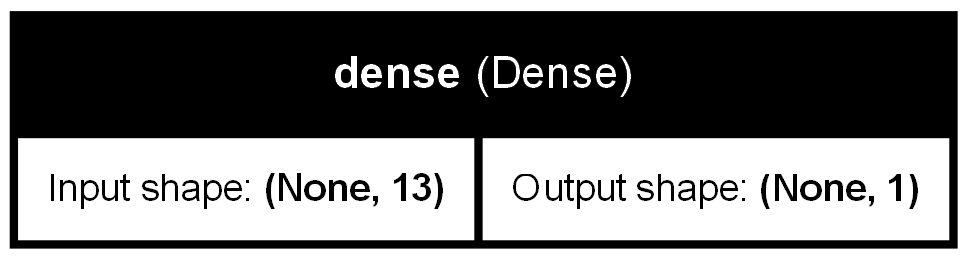

In [9]:
# Save the model visualization
plot_model(model, to_file='linear_model.png', show_shapes=True, show_layer_names=True)

In [10]:
# Compile the model
# model.compile(
#     optimizer='adam', # Keras uses the Adam optimizer with a default learning rate of 0.001.
#     loss='mean_squared_error',
#     metrics=['mae']
# )

optimizer = keras.optimizers.Adam(learning_rate=0.1)

model.compile(
    optimizer=optimizer,
    loss='mean_squared_error',
    metrics=['mae', 'mse']
)

In [11]:
# Train the model
history = model.fit(
    features_train_scaled, target_train,
    epochs=1000,
    validation_data=(features_test_scaled, target_test),
    verbose=0
)

In [12]:
# Convert history to DataFrame
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,mae,mse,val_loss,val_mae,val_mse
0,6.777969e+11,555757.6875,6.777969e+11,4.012552e+11,536754.0625,4.012552e+11
1,6.777700e+11,555746.6250,6.777700e+11,4.012313e+11,536743.9375,4.012313e+11
2,6.777426e+11,555736.2500,6.777426e+11,4.012070e+11,536733.9375,4.012070e+11
3,6.777149e+11,555725.9375,6.777149e+11,4.011825e+11,536724.0000,4.011825e+11
4,6.776873e+11,555714.8750,6.776873e+11,4.011579e+11,536714.0625,4.011579e+11


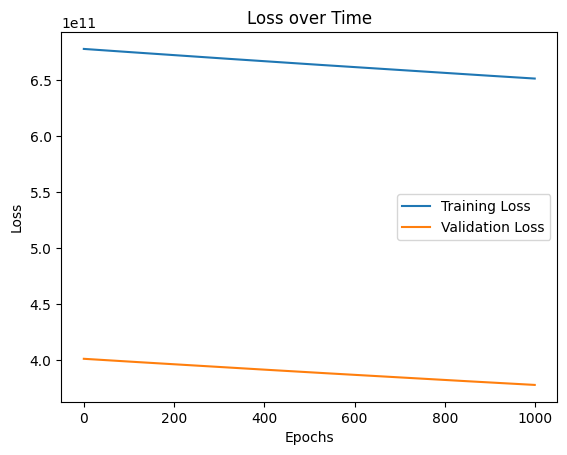

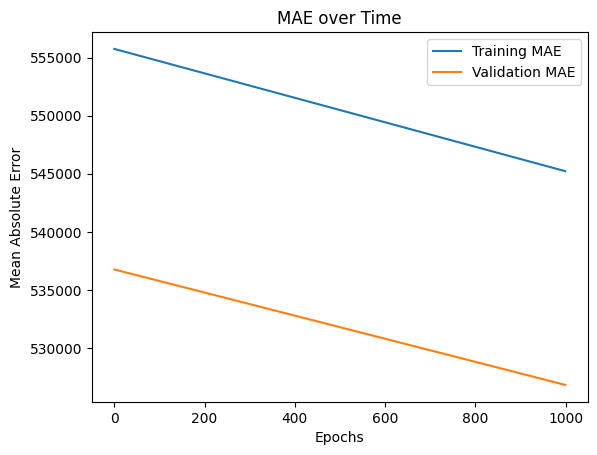

In [13]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Time')
plt.legend()
plt.show()

# Plot MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('MAE over Time')
plt.legend()
plt.show()